# Exercise 2: Poisson equation on a rectangle
Consider the equation
\begin{align}
	\Delta u(x,y) = f(x,y), \qquad 0<x<L, \, 0<y<H.
\end{align}

This is subject to Dirichlet boundary conditions, i.e. 
\begin{align}
	u(0,y) &= 0,\\
	u(L,y) &= 0,\\
	u(x,0) &= 0,\\
	u(x,H) &= 0.
\end{align}

We solve this equation using an eigenfunction expansion method. 

a) Why would you use eigenfunction expansion here? 

b) Why are now $u = \sum_{n=1}^\infty a_n(y) \phi_n(x)$ and $u = \sum_{n=1}^\infty a_n(x) \phi_n(y)$ both valid choices?

c) Use either form of the eigenfunction expansion. Define the eigenvalue problem, solve it, and derive the ODE for $a_n$. Don't solve the ODE for $a_n$ yet.

> **Checklist:**
> * If needed, check Notebook exercise 1b and 1c again for hints. 

The ODE for $a_n$ can be solved by hand, but this takes some effort. It is therefore done in the code below using sympy. 

d) Read through the code and comments. Note that this assumes $a_n(y)$ but if you chose $a_n(x)$ you will find the exact same result (simply interchange $y$ and $x$). Check the ODE for $a_n$ in the code against your solution to c). Inspect the solution of the ODE and note that sympy does not easily find the most elegant form of writing the solution. 

In [ ]:
%pip install numpy matplotlib sympy
## This code computes the function a_n(y) solving a second order ODE.
# Imports
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sympy as sp
from IPython.display import display
import numpy as np

# Define variables to use in Sympy
x_s, y_s, yb, H_s, L_s, lam = sp.symbols('x y \hat{y} H L lambda')
n_s = sp.symbols('n', integer = True, positive=True)
fn, an = sp.symbols('f_n a_n', cls=sp.Function)

# Define the differential equation for a_n(y).
# Note that f_n(y) = 2/L int_0^L f(x,y) phi_n(x) dx
de = sp.diff(an(y_s),y_s,2) - an(y_s)*lam - fn(y_s) # COMMENT ON MEANING OF fn

# Solve the differential equation using Sympy
sol_an = sp.dsolve(de, an(y_s)).rhs

# Initial conditions; this needs a few substitutions to get a reasonably nice expression
sol_an = sol_an.subs(sp.Integral(fn(y_s)*sp.exp(-sp.sqrt(lam)*y_s), y_s), sp.Integral(fn(yb)*sp.exp(-sp.sqrt(lam)*yb), (yb,0,y_s))) # manually substitute a definite integral, sympy by default uses indefinite integrals
sol_an = sol_an.subs(sp.Integral(fn(y_s)*sp.exp(sp.sqrt(lam)*y_s), y_s), sp.Integral(fn(yb)*sp.exp(sp.sqrt(lam)*yb), (yb,0,y_s))) # " "
C1, C2 = sp.symbols("C1, C2")  # define integration constants
cnd0 = sp.Eq(sol_an.subs(y_s, 0), 0) # substitute boundary condition y=0
cnd1 = sp.Eq(sol_an.subs(y_s, H_s), 0) # substitute boundary condition y=H
C1C2_sl = sp.solve([cnd0, cnd1], (C1, C2)) #  Solve for C1, C2
sol_an = sp.simplify(sol_an.subs(C1C2_sl)) # substitute C1, C2

# Show the result
display(sp.Eq(an(y_s),sol_an))

e) Write down the final solution for $u(x,y)$. You don't need to copy the explicit expression for $a_n$ to your paper, just write $a_n$.

We again use a combination of sympy and numpy to get to a visualisation of the results.
f) Inspect the modes and vary the numbers for `mode1`, `mode2`, `mode3`. How does the shape of the mode depend on the mode number? And what happens to the amplitude as the mode number gets larger?

Eq(f_n(y), -24*(-1)**n*L**5*y**5*(H - y)**2/(pi**5*n**5) - y**5*(H - y)**2*(6*L**5/(pi**3*n**3) - 24*L**5/(pi**5*n**5)))

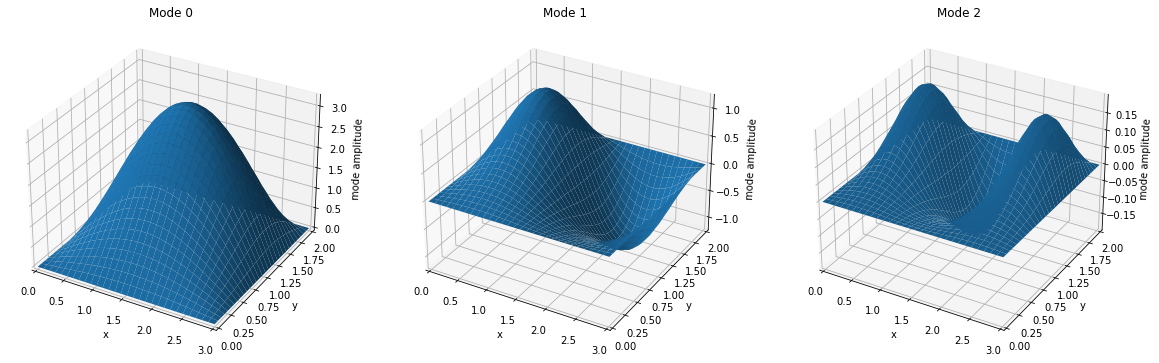

In [70]:
# Define variables
N=7
H=2 
L=3
lenx = 30
leny = 32

# Input for the function f(x,y). Note we are using variables y_s, x_s, H_s, L_s here as these are the Sympy variables. Variables y,x,H,L are here defined as numpy arrays.
f = y_s**5*(H_s-y_s)**2*x_s*(x_s-L_s)**3

# Define the dimensions x, y and mode number n
x = np.linspace(0,L,lenx).reshape((lenx,1,1))
y = np.linspace(0,H,leny).reshape((1,leny,1))
n = np.arange(1,N+1).reshape((1,1,N))

# Compute f_n and the eigenvalues lambda_n
f_n = sp.integrate(f*sp.sin(n_s*sp.pi/L_s*x_s),(x_s,0,L_s))
lambda_n = (n_s*sp.pi/L_s)**2

# Substitute f_n and lambda_n in the solution for a_n found earlier
sol_an2 = sol_an.replace(fn, lambda arg: f_n.replace(y_s,arg))
sol_an2 = sol_an2.replace(lam, lambda_n)
sol_an2 = sp.simplify(sol_an2).doit()
display(sp.Eq(fn(y_s),f_n))

# Convert to numpy and define phi_n (in numpy)
a_nfun = sp.lambdify((n_s,y_s,L_s,H_s), sol_an2, modules='numpy')
a_n = a_nfun(n,y,L,H)
phi_n = np.sin(n*np.pi/L*x)

# Modes
mode_n = a_n*phi_n

mode1 = 0 # mode numbers for plotting
mode2 = 1
mode3 = 2

# Plot
X, Y = np.meshgrid(x, y)
modes = [mode1, mode2, mode3]
fig = plt.figure(figsize=(20,8))
for q in range(3):
    ax = fig.add_subplot(1, 3, q+1, projection='3d')
    ax.plot_surface(X,Y,mode_n[:,:,modes[q]].T)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mode amplitude')
    ax.set_xlim(0,L)
    plt.ylim(0,H)
    plt.title('Mode '+str(modes[q]))

plt.show()

g) Have a look at the total solution $u(x,y)$ below. Try out some different functions for $f(x,y)$ in the code above and run the code above and below again to see the effect. 

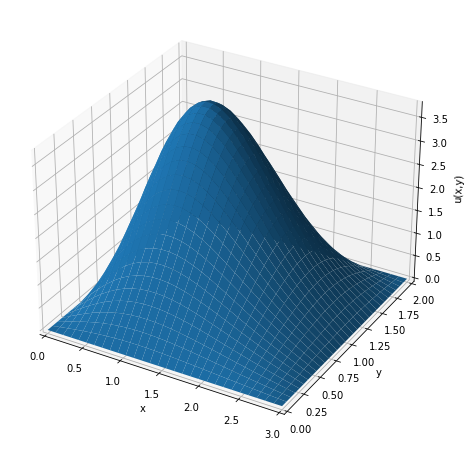

In [68]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X,Y,np.sum(mode_n,axis=2).T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_xlim(0,L)
plt.ylim(0,H)

plt.show()